<a href="https://colab.research.google.com/github/McManjitha/Image-Processing-Assignment-1/blob/main/image_processing_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Take Home Assignment 1**

### 1.  To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

Enter the intensity level in integer power so two: 2


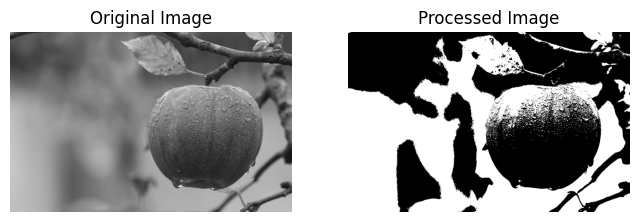

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Loading the image
image = cv2.imread('gray.jpeg', cv2.IMREAD_GRAYSCALE)

desired_levels = int(input("Enter the intensity level in integer power so two: "))
bits = int(math.log2(desired_levels))

# Calculate the intensity step size
intensity_level = 256 / desired_levels

# Reduce the number of intensity levels
new_image = np.floor_divide(image, intensity_level) * intensity_level

# Display the original and processed images using matplotlib
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()


### 2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

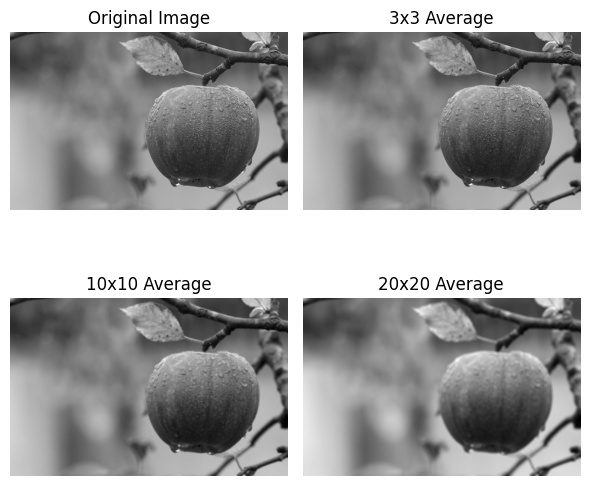

In [ ]:

# 3x3 average
average_3x3 = cv2.blur(image, (3, 3))

# 10x10 average
average_10x10 = cv2.blur(image, (10, 10))

# 20x20 average
average_20x20 = cv2.blur(image, (20, 20))

# Display the original and processed images
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(average_3x3, cmap='gray')
plt.title('3x3 Average')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(average_10x10, cmap='gray')
plt.title('10x10 Average')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(average_20x20, cmap='gray')
plt.title('20x20 Average')
plt.axis('off')

plt.tight_layout()
plt.show()


### 3. Rotate an image by 45 and 90 degrees.

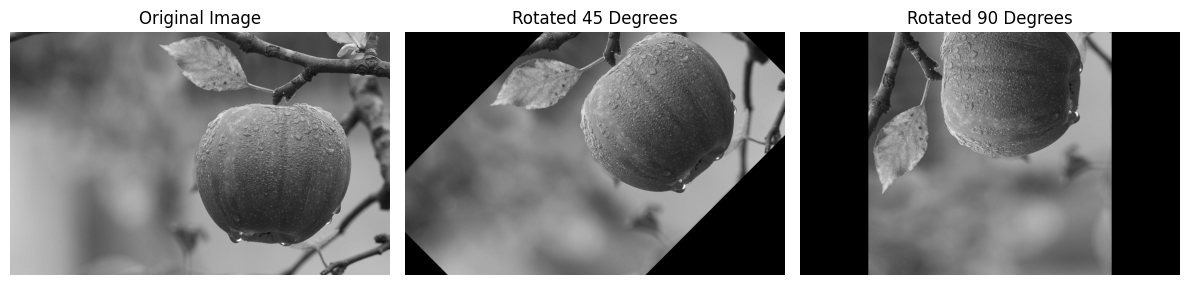

In [ ]:

# Rotate the image by 45 degrees
rows, cols = image.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_45 = cv2.warpAffine(image, M, (cols, rows))

# Rotate the image by 90 degrees
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
rotated_90 = cv2.warpAffine(image, M, (cols, rows))

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rotated_45, cmap='gray')
plt.title('Rotated 45 Degrees')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_90, cmap='gray')
plt.title('Rotated 90 Degrees')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
image.shape

(1204, 1880)

### 4. For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.


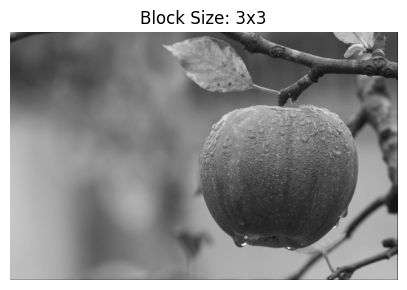

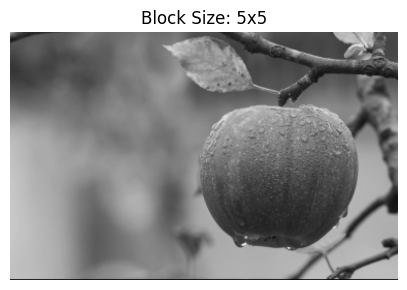

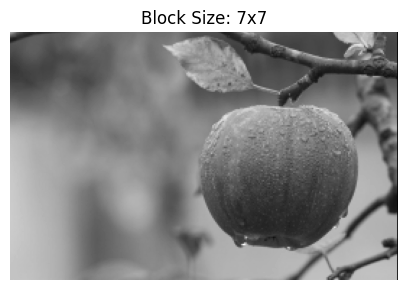

In [ ]:


# Define block sizes
block_sizes = [3, 5, 7]

# Create separate images for different block sizes
for i, block_size in enumerate(block_sizes):

    output_image = np.zeros_like(image)
    padding = block_size // 2

    for i in range(padding, image.shape[0] - padding, block_size):
        for j in range(padding, image.shape[1] - padding, block_size):
            # Calculate block boundaries
            block_row_start = i - padding
            block_row_end = i + padding + 1
            block_col_start = j - padding
            block_col_end = j + padding + 1
            # Extract block
            block = image[block_row_start:block_row_end, block_col_start:block_col_end]
            # Calculate average of block
            average_value = np.mean(block)
            # Replace block with average value
            output_image[block_row_start:block_row_end, block_col_start:block_col_end] = average_value

    cv2.imwrite(f'output_image_{block_size}x{block_size}.jpg', output_image)

for block_size in block_sizes:
    output_image = cv2.imread(f'output_image_{block_size}x{block_size}.jpg', cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(5, 5))
    plt.imshow(output_image, cmap='gray')
    plt.title(f'Block Size: {block_size}x{block_size}')
    plt.axis('off')
    plt.show()
